In [ ]:
                    Insurance Cost Analysis

In this project, I perform analytics operations on an insurance database using 19,404 data rows to predict the price of insurance policies using the below mentioned parameters.

Parameter	      Description	                          Content type
age	              Age in years	                          integer
gender	          Male or Female	                      integer (1 or 2)
bmi	              Body mass index	                      float
no_of_children	  Number of children	                  integer
smoker	          Whether smoker or not	                  integer (0 or 1)
region	          Which US region-NW, NE, SW, SE	      integer (1,2,3 or 4 respectively)
charges	          Annual Insurance charges in USD	      float

Objectives
In this project, I will:

Load the data as a pandas dataframe
Clean the data, taking care of the blank entries
Run exploratory data analysis (EDA) and identify the attributes that most affect the charges
Develop single variable and multi variable Linear Regression models for predicting the charges
Use Ridge regression to refine the performance of Linear regression models.

In [1]:
#Importing required libraries
import piplite
await piplite.install('seaborn')
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score, train_test_split

In [ ]:
Import The Dataset

In [2]:
#Loading the data file
file_name="insurance.csv"
df = pd.read_csv(file_name)

In [3]:
#Explore the dataset
df.head()

,19,1,27.9,0,1.1,3,16884.924
0,18,2,33.770,1,0,4,1725.55230
1,28,2,33.000,3,0,4,4449.46200
2,33,2,22.705,0,0,1,21984.47061
3,32,2,28.880,0,0,1,3866.85520
4,31,1,25.740,0,?,4,3756.62160


In [4]:
#As we can see that this dataset doesn't have column headings
#Add the headers to the dataframe, as mentioned in the project scenario
headers = ["age", "gender", "bmi", "no_of children", "smoker", "region", "charges"]
df.columns = headers
df.head(10)

,age,gender,bmi,no_of children,smoker,region,charges
0,18,2,33.770,1,0,4,1725.55230
1,28,2,33.000,3,0,4,4449.46200
2,33,2,22.705,0,0,1,21984.47061
3,32,2,28.880,0,0,1,3866.85520
4,31,1,25.740,0,?,4,3756.62160
5,46,1,33.440,1,0,4,8240.58960
6,37,1,27.740,3,0,1,7281.50560
7,37,2,29.830,2,0,2,6406.41070
8,60,1,25.840,0,0,1,28923.13692
9,25,2,26.220,0,0,2,2721.32080


In [5]:
#Replace the '?' entries with 'NaN' values
df.replace('?',np.nan, inplace = True)

In [ ]:
Data Wrangling

In [6]:
#Identify the columns that have some 'Null' (or NaN) information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2771 entries, 0 to 2770
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             2767 non-null   object 
 1   gender          2771 non-null   int64  
 2   bmi             2771 non-null   float64
 3   no_of children  2771 non-null   int64  
 4   smoker          2764 non-null   object 
 5   region          2771 non-null   int64  
 6   charges         2771 non-null   float64
dtypes: float64(2), int64(3), object(2)
memory usage: 130.0+ KB


In [7]:
#Handle missing data for "age" and "smoker" column
# smoker is a categorical attribute, replace with most frequent entry
is_smoker = df['smoker'].value_counts().idxmax()
df["smoker"].replace(np.nan, is_smoker, inplace = True)
# age is a continuous variable, replace with mean age
mean_age = df['age'].astype('float').mean()
df["age"].replace(np.nan, mean_age, inplace=True)
# Update data types
df[["smoker", "age"]] = df[["smoker", "age"]].astype("int")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2771 entries, 0 to 2770
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             2771 non-null   int32  
 1   gender          2771 non-null   int64  
 2   bmi             2771 non-null   float64
 3   no_of children  2771 non-null   int64  
 4   smoker          2771 non-null   int32  
 5   region          2771 non-null   int64  
 6   charges         2771 non-null   float64
dtypes: float64(2), int32(2), int64(3)
memory usage: 130.0 KB


In [8]:
#Round up the "charges" values to 2 decimal places
df["charges"] = np.round(df["charges"],2)
df.head()

,age,gender,bmi,no_of children,smoker,region,charges
0,18,2,33.770,1,0,4,1725.55
1,28,2,33.000,3,0,4,4449.46
2,33,2,22.705,0,0,1,21984.47
3,32,2,28.880,0,0,1,3866.86
4,31,1,25.740,0,0,4,3756.62


In [ ]:
Exploratory Data Analysis

In [21]:
#Print the correlation matrix for the dataset to see which independent variable are most related to the variable "charges"
print(df.corr())

                     age    gender       bmi  no_of children    smoker  \
age             1.000000 -0.026584  0.112859        0.037126 -0.022290   
gender         -0.026584  1.000000  0.042766        0.015693  0.083125   
bmi             0.112859  0.042766  1.000000       -0.001642  0.011824   
no_of children  0.037126  0.015693 -0.001642        1.000000  0.007016   
smoker         -0.022290  0.083125  0.011824        0.007016  1.000000   
region         -0.006969  0.022360  0.271200       -0.025594  0.053839   
charges         0.298892  0.062959  0.199906        0.066551  0.789141   

                  region   charges  
age            -0.006969  0.298892  
gender          0.022360  0.062959  
bmi             0.271200  0.199906  
no_of children -0.025594  0.066551  
smoker          0.053839  0.789141  
region          1.000000  0.054018  
charges         0.054018  1.000000  


(0.0, 66902.85800000001)

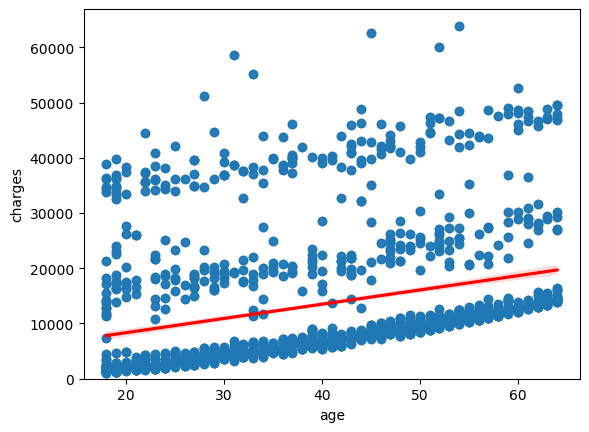

In [23]:
#I chose to investigate the relationship between 'charges' and 'age', 'bmi', and 'smoker' because their correlations with charges appear to be more significant than others.#Implement the regression plot for "charges" with respect to "age"
#Implement the regression plot for "charges" with respect to "age"
sns.regplot(x="age",y="charges", data=df, line_kws={'color':'red'})
plt.ylim(0,)

In [ ]:
The scatter plot reveals no relation between "charges" and "age"

(0.0, 66902.85800000001)

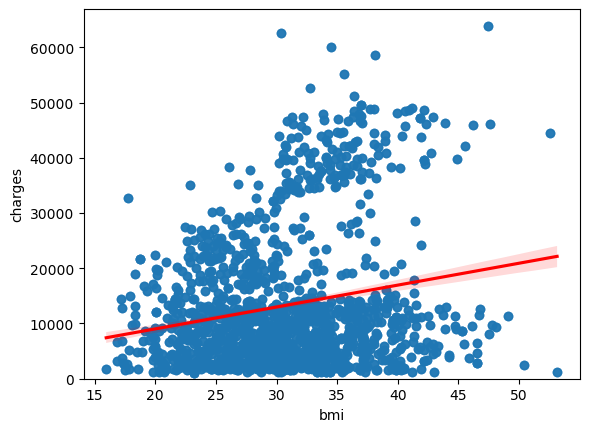

In [9]:
#Implement the regression plot for "charges" with respect to "bmi"
sns.regplot(x="bmi",y="charges", data=df, line_kws={'color':'red'})
plt.ylim(0,)

In [ ]:
The plot demonstrates the possitive relationship between "charges" and "bmi". It means that if an insurer had a high bmi, their charges would be high as well, but it is not really significant. Next, an investigation on whether there is any ouliers for smoker variable. Box plot will be used in this case

<AxesSubplot:xlabel='smoker', ylabel='charges'>

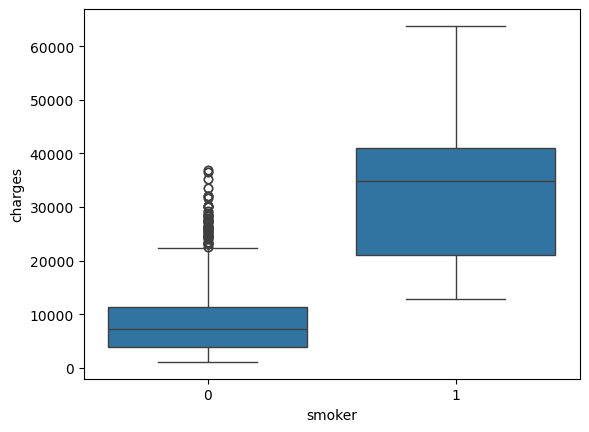

In [10]:
#Implement the box plot for "charges" with respect to "smoker"
sns.boxplot(x="smoker", y="charges", data=df)

In [ ]:
The above box plot shows that some non-smoker insurers have irregular charges, indicated by outliers in the '0' box. This could be due to other factors such as high BMI or age.

In [ ]:
Model Development
In the EDA, "smoker" stands out to have the highest correlation with the variable "charges", I decide to examine the relationship between these two variable by calculating the R-Squared value

In [12]:
#Linear Regression is used to investigate the relationship and to confirm its significance by calculating the R-Squared value.
x=df[['smoker']]
y=df[['charges']]
lm=LinearRegression()
lm.fit(x,y)
print(lm.score(x,y))

0.6227430402464125


In [13]:
#Then I consider the relationship of other variables in relation to the charges to see if the R-Squared value improves.
z=df[["age", "gender", "bmi", "no_of children", "smoker", "region"]]
lm.fit(z,y)
print(lm.score(z,y))


0.7505888664568174


In [ ]:
As we can see, the R-squared value improves when other independent variables are added to this regression. This indicates that age, gender, BMI, number of children, smoker status, and region all influence insurance charges, though the relationship specifically with smoking is particularly significant.

In [ ]:
Training pipelines enhance the machine learning workflow by automating and standardizing tasks such as data preprocessing, model training, and evaluation. This boosts efficiency, consistency, and reproducibility, while also simplifying scaling and debugging.
Pipelines save time, support collaboration, and ensure experiments can be reliably repeated, ultimately improving the performance and maintainability of machine learning projects. Training pipeline is selected to build a model that can predict the "charges" value.

In [14]:
#Create a training pipeline that uses StandardScaler(), PolynomialFeatures() and LinearRegression() to create the model. There should be even further improvement in the performance.

Input=[('scale',StandardScaler()), ('polynomial', PolynomialFeatures(include_bias=False)), ('model', LinearRegression())]
pipe=Pipeline(Input)
z = z.astype(float)
pipe.fit(z,y)
ypipe=pipe.predict(z)
print(r2_score(y,ypipe))

0.8453681600043882


In [ ]:
Model Refinement
#The dataset will be split into 80% of the training set and 20% of the test set to test it's reliability

In [15]:
#Split the data into training and testing subsets
x_train, x_test, y_train, y_test = train_test_split(z, y, test_size=0.2, random_state=1)


In [ ]:
Ridge Regression offers several advantages over other regression techniques, particularly in scenarios with multicollinearity or when dealing with high-dimensional data. By adding a penalty term to the loss function, Ridge Regression effectively shrinks the coefficients of less important features towards zero,
reducing their impact. This regularization helps prevent overfitting and improves the model's generalization to new data. Additionally, Ridge Regression handles multicollinearity by distributing the effect among correlated predictors, providing more stable and reliable estimates. Thus, Ridge Regression is chosen for this analysis

In [ ]:
An alpha value of 0.1 provides a moderate level of regularization. This means that while the model will penalize large coefficients to prevent overfitting, it will not do so as aggressively as higher alpha values. This can be useful when you want to maintain a reasonable complexity in the model without overly shrinking the coefficients.

In [ ]:
Choosing a degree-2 polynomial transformation for training parameters offers several advantages in data analysis. It effectively captures non-linear relationships within the data, allowing the model to fit more complex patterns that linear models cannot. By introducing squared terms and interaction effects between features, the transformation enhances the model's flexibility and ability to interpret data interactions. This approach balances complexity with model interpretability, often leading to improved predictive performance on both training and test datasets. Validating the degree choice through methods like cross-validation ensures optimal model generalization for accurate predictions.

In [16]:
#Initialize a Ridge regressor that used hyperparameter alpha = 0.1. Fit the model using training data data subset. Print the R-Squared score for the testing data.
RidgeModel=Ridge(alpha=0.1)
RidgeModel.fit(x_train, y_train)

yhat = RidgeModel.predict(x_test)
print(r2_score(y_test,yhat))

0.7254198858412217


In [ ]:
Polynomial transformation offers several benefits in data analysis and modeling. By transforming variables into higher-degree polynomials, it allows for capturing nonlinear relationships that simple linear models cannot. This flexibility helps in better fitting complex data patterns and improving model accuracy. Additionally, polynomial transformations can mitigate underfitting by adding complexity to the model, thereby reducing bias. This technique is particularly useful in scenarios where relationships between variables are not linear, providing a more comprehensive understanding of data dynamics and improving predictive performance in machine learning tasks.

In [17]:
#Apply polynomial transformation to the training parameters with degree=2. Use this transformed feature set to fit the same regression model, as above, using the training subset. Print the R-Squared score for the testing subset.
pr = PolynomialFeatures(degree=2)
x_train_pr = pr.fit_transform(x_train)
x_test_pr = pr.fit_transform(x_test)
RidgeModel.fit(x_train_pr, y_train)
y_hat = RidgeModel.predict(x_test_pr)
print(r2_score(y_test,y_hat))

0.8208413195172275


In [24]:
#Apply polynomial transformation to the training parameters with degree=3. Use this transformed feature set to fit the same regression model, as above, using the training subset. Print the R-Squared score for the testing subset.
pr = PolynomialFeatures(degree=3)
x_train_pr = pr.fit_transform(x_train)
x_test_pr = pr.fit_transform(x_test)
RidgeModel.fit(x_train_pr, y_train)
y_hat = RidgeModel.predict(x_test_pr)
print(r2_score(y_test,y_hat))

0.8246833751477002


In [ ]:
After applying polynomial transformations with degrees 2 and 3, the R-squared scores did not show significant improvement. Therefore, I decided to finalize the analysis by selecting the degree 2 model to avoid unnecessary complexity that could lead to overfitting. This model has been chosen for deployment.

In [20]:
Thank you for taking the time to review this project. Any valuable feedback is appreciated, and please feel free to connect with me for further discussion.